## Resume Classification
### Business objective:
* **The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention**


## 1. Import Library

In [20]:
!pip install docx2txt
import os
import spacy
import docx2txt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

## 2. About Dataset

In [23]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
file_path   = r'/content/drive/MyDrive/Resumes'
doc_file    = []
pdf_file    = []
docx_file   = []
folder_name = []

for folder in os.listdir(file_path):
    folder_path = os.path.join(file_path, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            if file.endswith('.doc'):
                doc_file.append(file)
                folder_name.append(folder)
            elif file.endswith('.docx'):
                docx_file.append(file)
                folder_name.append(folder)
            else:
                pdf_file.append(file)
                folder_name.append(folder)

Mounted at /content/drive


In [24]:
print('Number of .doc Files  = {}'.format(len(doc_file)),'\n'
      'Number of .pdf Files  = {}'.format(len(pdf_file)),'\n'
      'Number of .docx Files = {}'.format(len(docx_file)))

Number of .doc Files  = 26 
Number of .pdf Files  = 1 
Number of .docx Files = 52


In [25]:
print("Total Number of Files = ", len(docx_file)+len(doc_file)+len(pdf_file))

Total Number of Files =  79


### 2.1 Type of File Format

In [26]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

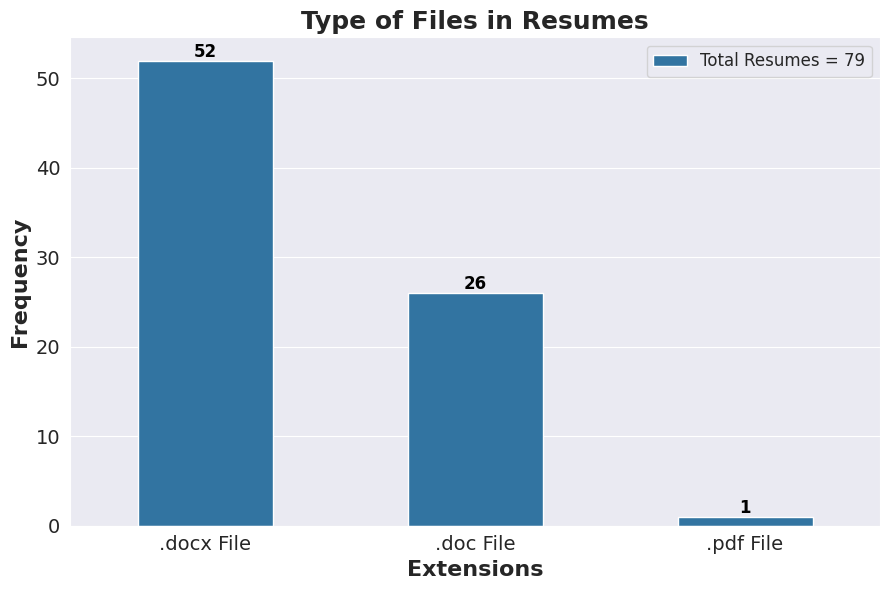

In [27]:
fig, axe = plt.subplots(1,1, figsize=(9,6), dpi=100)
ax = sns.barplot(x=['.docx File','.doc File','.pdf File'], y= [len(docx_file),len(doc_file),len(pdf_file)], width=0.5,
                 ax = axe, label= 'Total Resumes = {}'.format(len(docx_file)+len(doc_file)+len(pdf_file)))

axe.set_xlabel('Extensions', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.legend(loc='best', fontsize= 'large')
plt.title('Type of Files in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG\File_Type_Bar', dpi = 500)

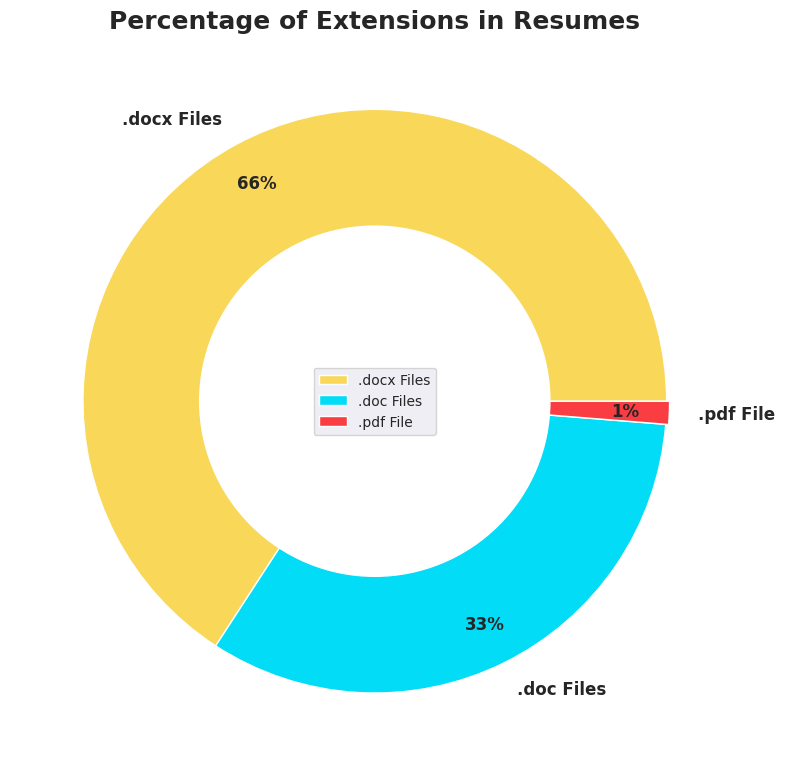

In [28]:
fig = plt.figure(figsize=(8,8), dpi = 100)

sizes = [len(docx_file),len(doc_file),len(pdf_file)]
labels = ['.docx Files','.doc Files','.pdf File']
colors = ['#F9D759', '#03DCF6', '#F93D43']
explode = (0.00, 0.00, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance= 0.85,
        explode= explode, startangle= 0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='w')
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Extensions in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc= "center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG\Per_File_Pai', dpi = 500)

## 3. Extract Resumes by Profile Category

In [29]:
file_path = r'/content/drive/MyDrive/Resumes'
file_name = []
profile   = []

for folder in os.listdir(file_path):
    folder_path = os.path.join(file_path, folder)
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            profile.append(folder)
            file_name.append(file)
        elif file.endswith('.docx'):
            profile.append(folder)
            file_name.append(file)
        else:
            profile.append(folder)
            file_name.append(file)

In [30]:
resume_data = pd.DataFrame()
resume_data['Profile'] = profile
resume_data['Resumes'] = file_name
resume_data

,Profile,Resumes
0,Internship,Internship_Susovan Bag_Musquare Technologies.docx
1,Internship,Internship_Ravali_Musquare Technologies (1).docx
2,Peoplesoft resumes,PeopleSoft DBA_Vivekanand Sayana.docx
3,Peoplesoft resumes,Peoplesoft Admin_SirazuddinMohammad.docx
4,Peoplesoft resumes,Peoplesoft Finance_Pritam Biswas.doc
...,...,...
74,workday resumes,Naresh Babu Cherukuri_Hexaware.doc
75,workday resumes,P V Sai Krishna_ Hexaware.docx
76,workday resumes,MooraboyinaGuravaiah_Hexaware.docx
77,workday resumes,Venkateswarlu B_Hexaware.doc


In [31]:
resume_data.Profile.value_counts().index

Index(['Reactjs developer', 'workday resumes', 'Peoplesoft resumes',
       'SQL Developer Lightning insight', 'Internship'],
      dtype='object', name='Profile')

In [33]:
resume_data.Profile.value_counts()

,count
Profile,
Reactjs developer,22
workday resumes,21
Peoplesoft resumes,20
SQL Developer Lightning insight,14
Internship,2


### 3.1 Number of Total Resumes

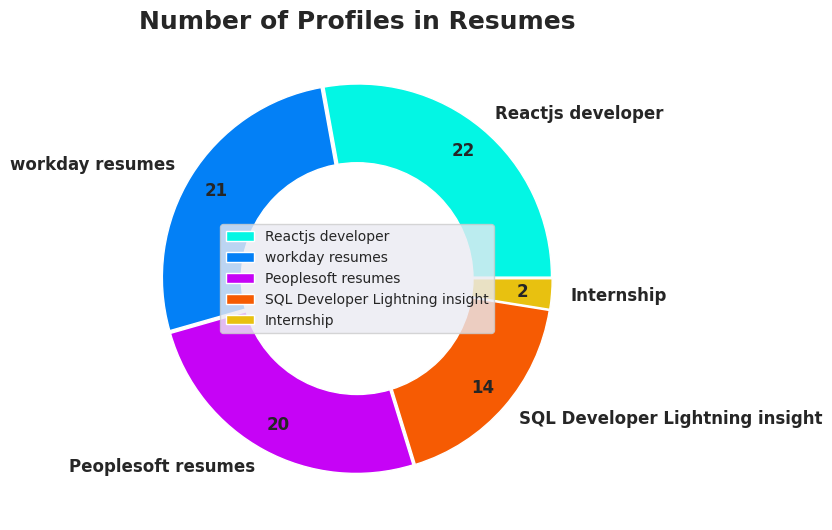

In [34]:
fig = plt.figure(figsize=(8,8))

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#03F6E4', '#0380F6', '#C603F6', '#F65B03', '#E8C110'] #, '#4dc0b5', '#03F6E4', '#0380F6', '#C603F6', '#E8C110'
explode = (0.01, 0.01, 0.01, 0.01,0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= lambda x:'{:.0f}'.format(x*sizes.sum()/100),
        pctdistance= 0.85, explode= explode, startangle=0, textprops= {'size':'large', 'fontweight':'bold'})


centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Number of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
#fig.savefig('IMG/No_Resume_Pai', dpi = 500)

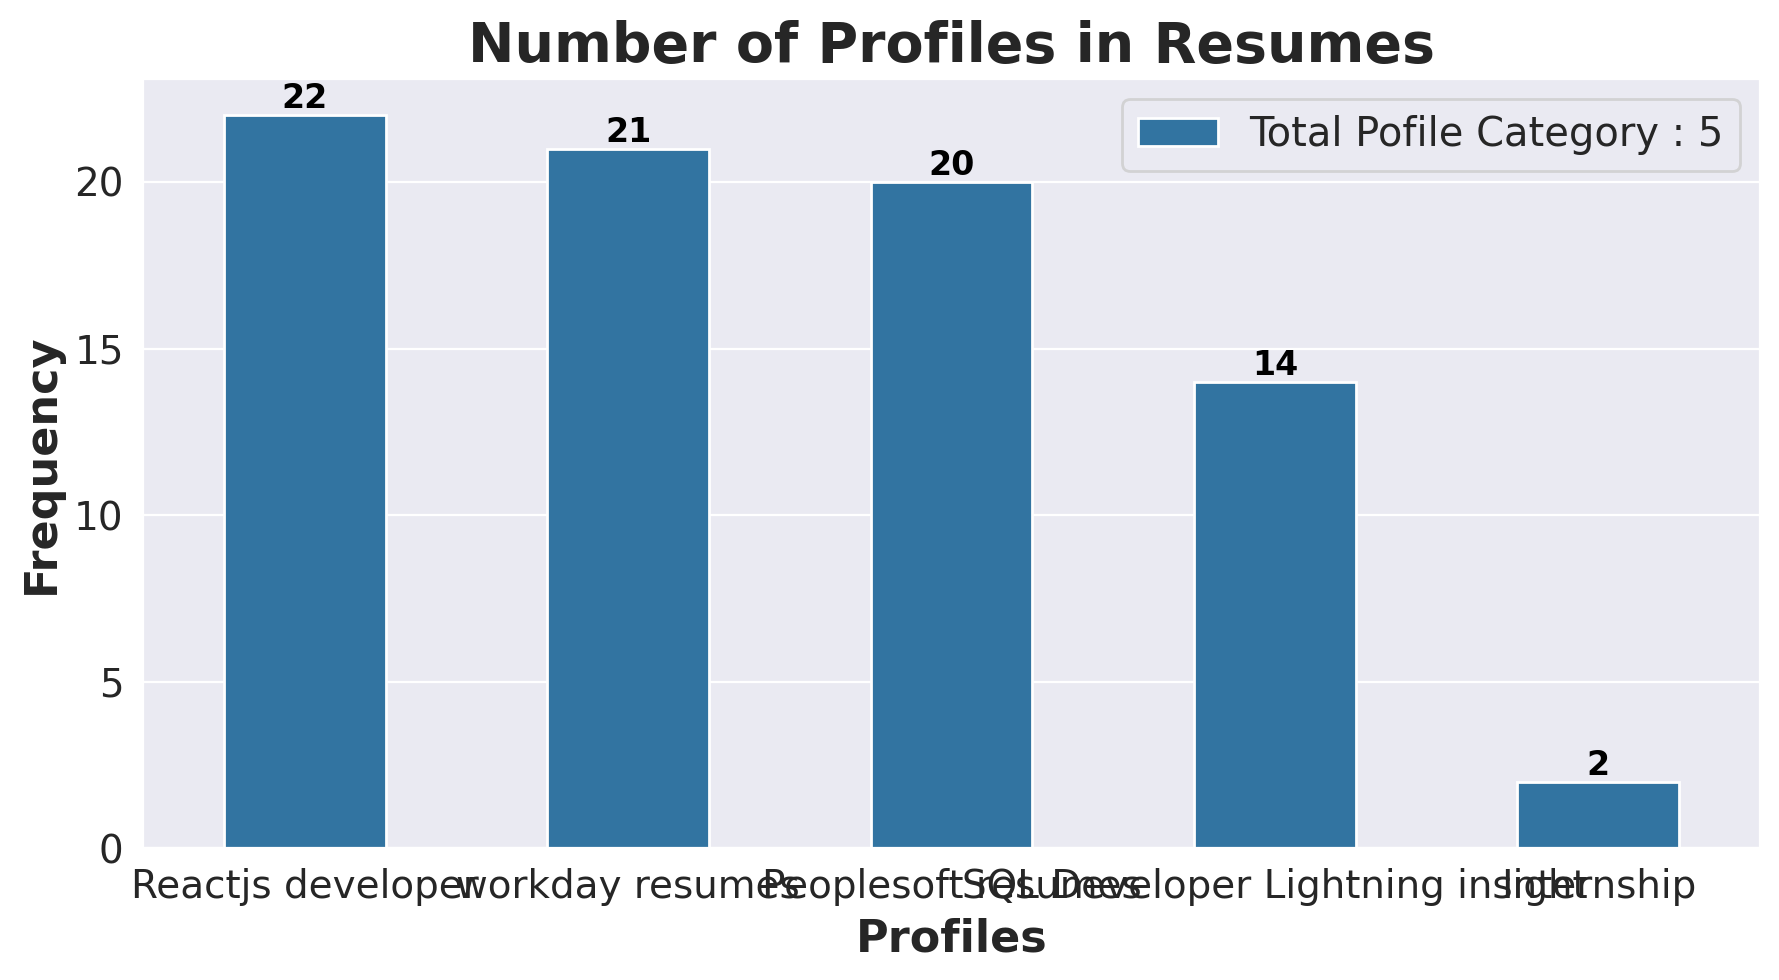

In [36]:
fig, axe = plt.subplots(1,1, figsize=(9,5), dpi=200)

# Get the value counts as a pandas Series
profile_counts = resume_data.Profile.value_counts()

# Use the index (categories) as x and values (counts) as y
ax = sns.barplot(x= profile_counts.index, y= profile_counts.values, width=0.5,
                 ax= axe, label= 'Total Pofile Category : {}'.format(len(profile_counts)))

axe.set_xlabel('Profiles', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Number of Profiles in Resumes', fontsize= 20, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
#fig.savefig('IMG/No_Resume_Bar', dpi = 500)

### Percentage of Profiles Category

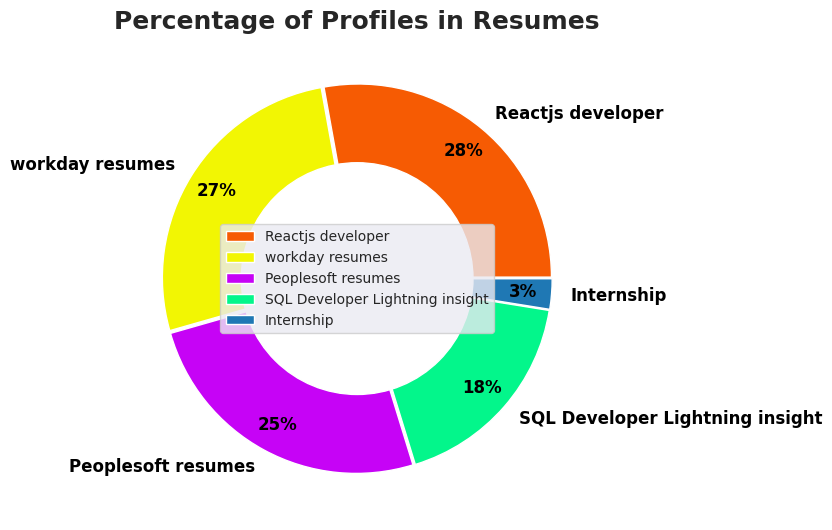

In [38]:
fig = plt.figure(figsize=(8,8),dpi=100)

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#F65B03', '#F2F603', '#C603F6', '#03F68B', '#1F78B4']
explode = (0.01, 0.01, 0.01, 0.01,0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance=0.85, explode= explode,
        startangle= 0, textprops= {'size':'large', 'fontweight':'bold', 'color':'black'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
#fig.savefig('IMG/Per_Cat_Pai', dpi = 500)

## 4. Reading a Resume File

In [39]:
def extract_text_from_docx(docx_path):
    txt = docx2txt.process(docx_path)
    if txt:
        return txt.replace('\t', ' ')
    return None

print(extract_text_from_docx('/content/drive/MyDrive/Resumes/Reactjs developer/React Developer_Haripriya.docx'))

HARIPRIYA BATTINA 

Experience as UI Developer in Reactjs, JavaScript. 

Phone: +91 9908576950 

Gmail: haripriyabattini@gmai.com 

Location: Visakhapatnam 

JOB OBJECTIVE ● Looking for a challenging role to put my experience in various aspects of technology with an objective to be a leading source of information and guidance concerning th

technological requirements. 

● Want to be a part of a reputed organization that allows me to effectively use my 

technical skills in the real world for overall growth of organization and my 

professional career. 

WORK EXPERIENCE EDUCATION 

1. Associate UI Developr 

Company: Blue Yonder, Hyderabad. 

● Work Done On “COPERNICUS” Project. 

● The Main Moto of this project is, it is GTM (Go To Market) Portal which is specially designed for demo teams to shower case Blue Yonder Products and Features for Customers and Partners 

● Technologies: HTML, CSS, React JS. 

● IDE: VS Code. 

● Methodologies: Agile. 

JOB RESPONSIBILITIES: 

● Involved Desi

## 5. Data Exploration

In [41]:
resume_data = pd.read_csv('/content/Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,peoplesoft administrator srinivas experience s...
1,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
2,PeopleSoft,profile summary years experience implementing ...
3,PeopleSoft,classification internal classification interna...
4,PeopleSoft,vinod akkala peoplesoft dba admin professional...
...,...,...
74,Workday,pic pic years experience workday hcm technical...
75,Workday,srikanth workday hcm consultant seeking suitab...
76,Workday,ramesh workday hcm consultant professional sum...
77,Internship,name ravali curriculum vitae specialization co...


### 5.1 N-grams
* **N-grams analyses are often used to see which words often show up together.**

In [44]:
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
from textblob import TextBlob
TextBlob(resume_data['Resume_Details'][1]).ngrams(1)[:20]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[WordList(['sirazuddin']),
 WordList(['bangalore']),
 WordList(['india']),
 WordList(['sirazuddin']),
 WordList(['bangalore']),
 WordList(['india']),
 WordList(['profile']),
 WordList(['summary']),
 WordList(['overall']),
 WordList(['years']),
 WordList(['experience']),
 WordList(['peoplesoft']),
 WordList(['administrator']),
 WordList(['installed']),
 WordList(['peopletools']),
 WordList(['scratch']),
 WordList(['including']),
 WordList(['products']),
 WordList(['experience']),
 WordList(['peopletools'])]

In [45]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(2)[:20]

[WordList(['sirazuddin', 'bangalore']),
 WordList(['bangalore', 'india']),
 WordList(['india', 'sirazuddin']),
 WordList(['sirazuddin', 'bangalore']),
 WordList(['bangalore', 'india']),
 WordList(['india', 'profile']),
 WordList(['profile', 'summary']),
 WordList(['summary', 'overall']),
 WordList(['overall', 'years']),
 WordList(['years', 'experience']),
 WordList(['experience', 'peoplesoft']),
 WordList(['peoplesoft', 'administrator']),
 WordList(['administrator', 'installed']),
 WordList(['installed', 'peopletools']),
 WordList(['peopletools', 'scratch']),
 WordList(['scratch', 'including']),
 WordList(['including', 'products']),
 WordList(['products', 'experience']),
 WordList(['experience', 'peopletools']),
 WordList(['peopletools', 'application'])]

In [46]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(3)[:20]

[WordList(['sirazuddin', 'bangalore', 'india']),
 WordList(['bangalore', 'india', 'sirazuddin']),
 WordList(['india', 'sirazuddin', 'bangalore']),
 WordList(['sirazuddin', 'bangalore', 'india']),
 WordList(['bangalore', 'india', 'profile']),
 WordList(['india', 'profile', 'summary']),
 WordList(['profile', 'summary', 'overall']),
 WordList(['summary', 'overall', 'years']),
 WordList(['overall', 'years', 'experience']),
 WordList(['years', 'experience', 'peoplesoft']),
 WordList(['experience', 'peoplesoft', 'administrator']),
 WordList(['peoplesoft', 'administrator', 'installed']),
 WordList(['administrator', 'installed', 'peopletools']),
 WordList(['installed', 'peopletools', 'scratch']),
 WordList(['peopletools', 'scratch', 'including']),
 WordList(['scratch', 'including', 'products']),
 WordList(['including', 'products', 'experience']),
 WordList(['products', 'experience', 'peopletools']),
 WordList(['experience', 'peopletools', 'application']),
 WordList(['peopletools', 'application

In [47]:
resume_data['Resume_Details']

,Resume_Details
0,peoplesoft administrator srinivas experience s...
1,sirazuddin bangalore india sirazuddin bangalor...
2,profile summary years experience implementing ...
3,classification internal classification interna...
4,vinod akkala peoplesoft dba admin professional...
...,...
74,pic pic years experience workday hcm technical...
75,srikanth workday hcm consultant seeking suitab...
76,ramesh workday hcm consultant professional sum...
77,name ravali curriculum vitae specialization co...


In [48]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### 5.2 Top 20 most used words in Resumes
* **Using CountVectorizer**

In [49]:
countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
ngrams = countvec.fit_transform(resume_data['Resume_Details']) # matrix of ngrams
count_values = ngrams.toarray().sum(axis=0) # count frequency of ngrams

vocab = countvec.vocabulary_ # list of ngrams
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})

In [50]:
df_ngram.head(20)

,Frequency,Unigram_Bigram
0,598,experience
1,453,peoplesoft
2,431,workday
3,418,application
4,395,using
5,359,server
6,332,data
7,326,reports
8,326,project
9,280,sql


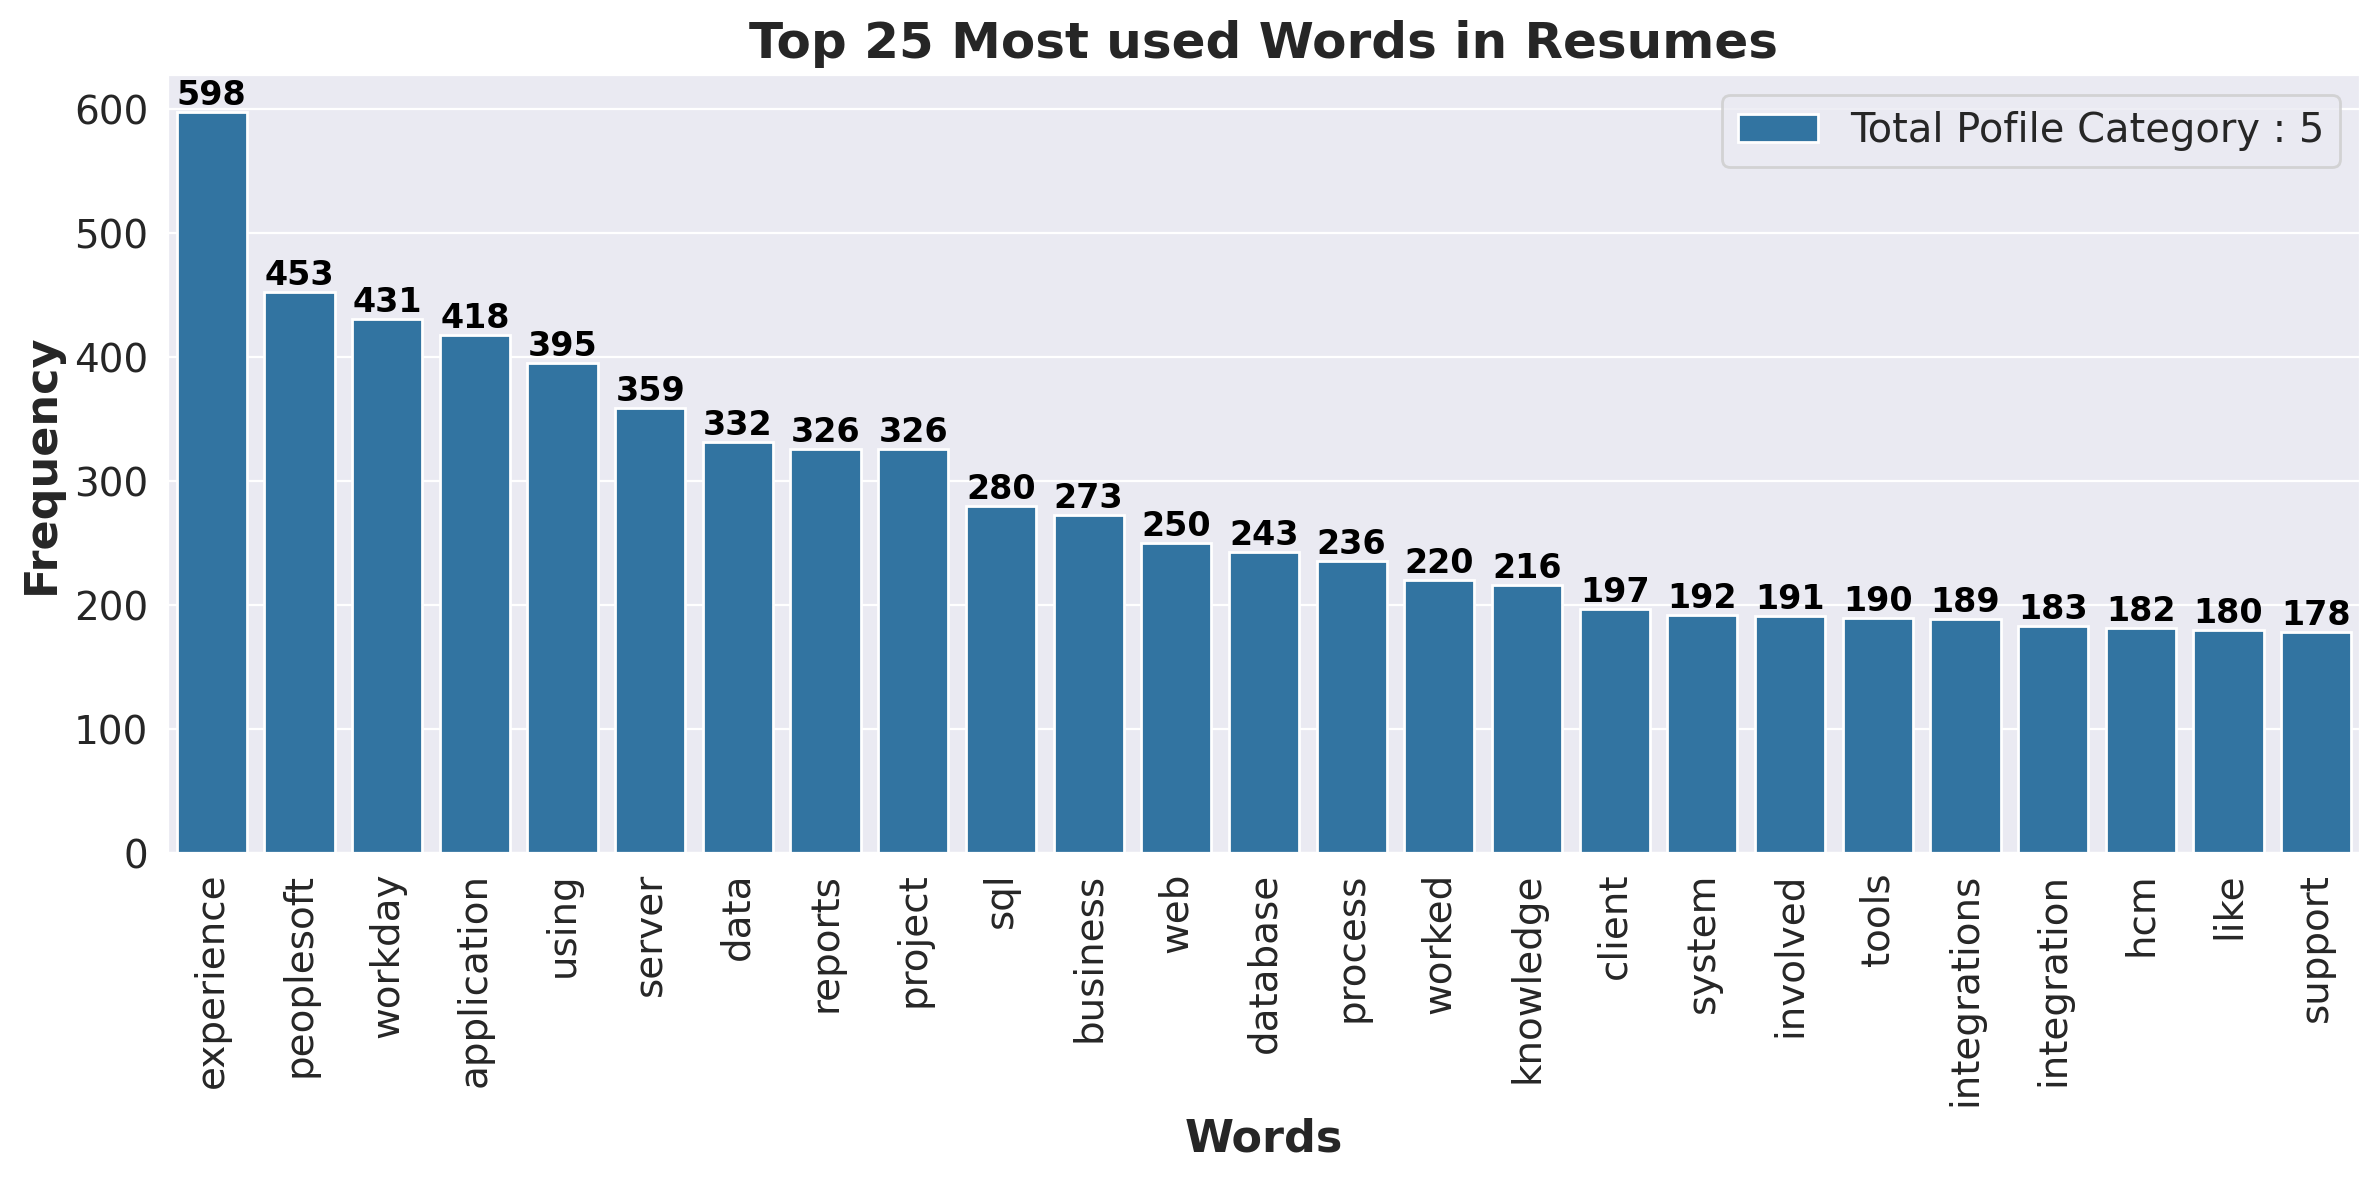

In [51]:
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=200)
ax = sns.barplot(x=df_ngram['Unigram_Bigram'].head(25), y=df_ngram.Frequency.head(25), data=resume_data, ax = axe,
            label='Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Words', size=16,fontweight= 'bold')
axe.set_ylabel('Frequency', size=16, fontweight= 'bold')
plt.xticks(rotation = 90)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Words in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

### 5.4 Using the Word Clowds

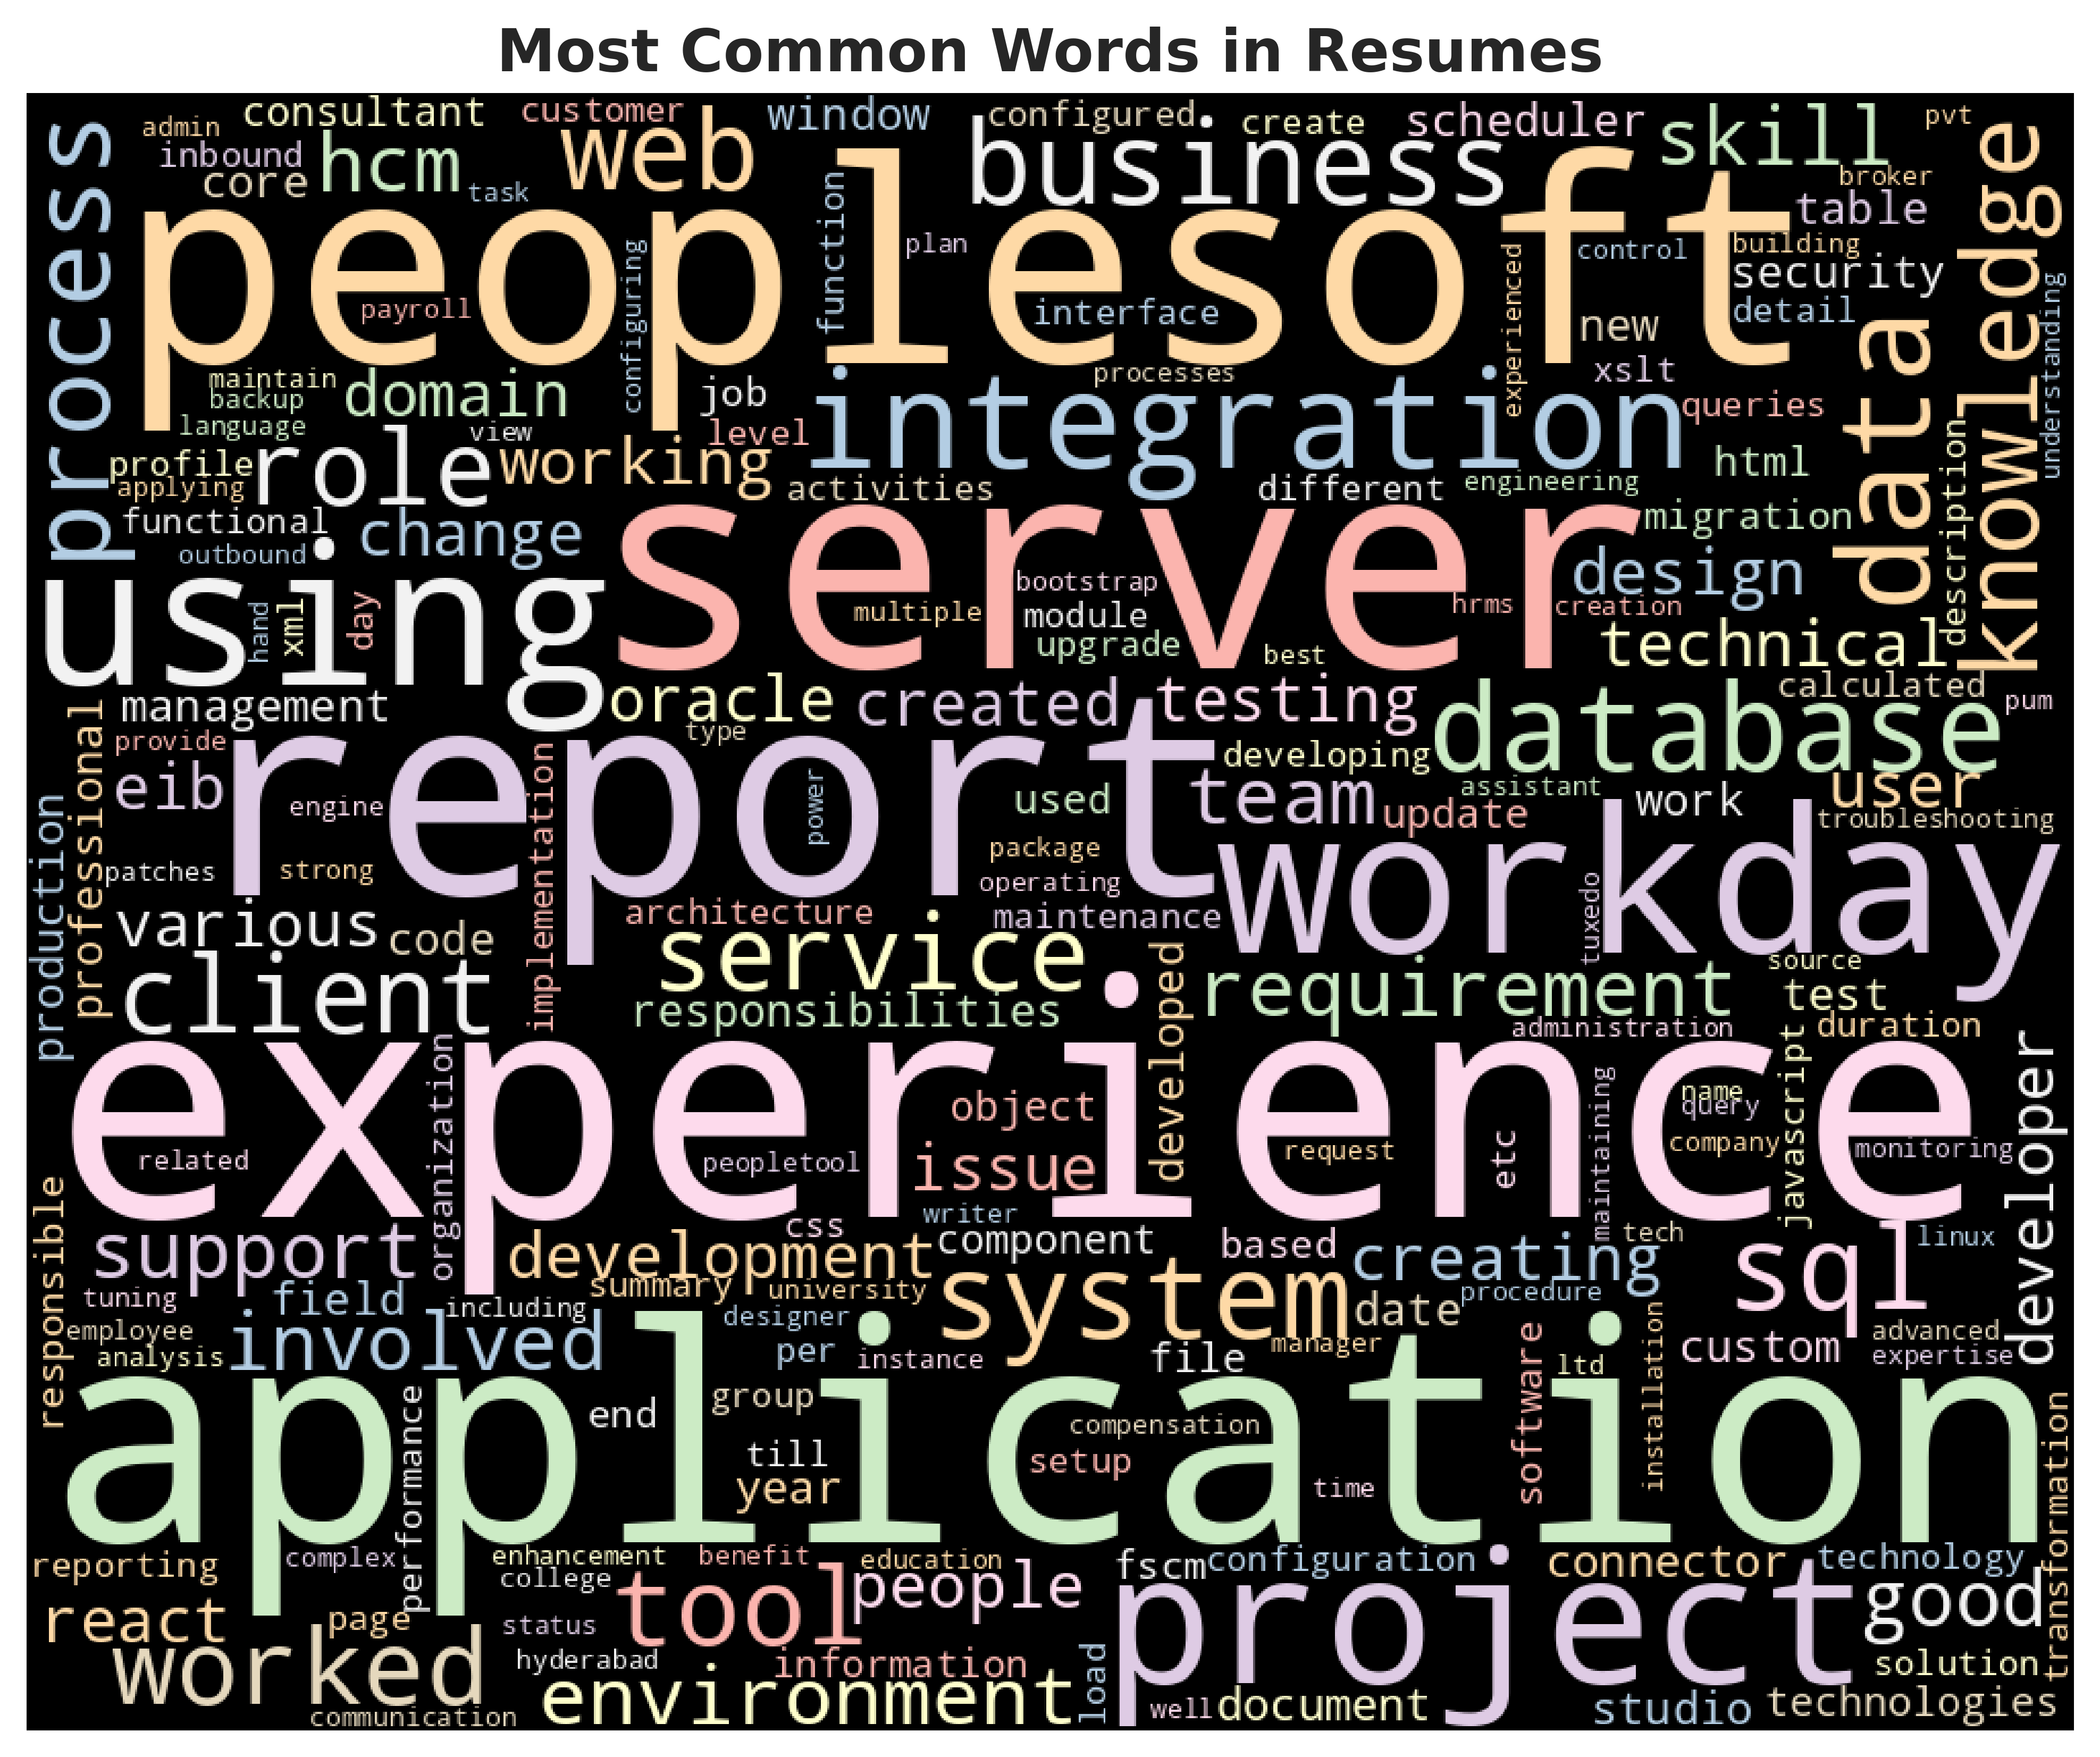

In [52]:
text = " ".join(cat for cat in resume_data.Resume_Details) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black",
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Resumes', fontsize= 16, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

# THE END !!